## 1. The Way of the Program

#### Exercise 1-1
1. In a print statement, what happens if you leave out one of the parentheses, or both?

2. If you are trying to print a string, what happens if you leave out one of the quotation marks, or both?

3. You can use a minus sign to make a negative number like -2. What happens if you put a plus sign before a number? What about 2++2?

4. In math notation, leading zeros are okay, as in 02. What happens if you try this in Julia?

5. What happens if you have two values with no operator between them?

#### Exercise 1-2
1. How many seconds are there in 42 minutes 42 seconds?
2. How many miles are there in 10 kilometers?
3. If you run a 10-kilometer race in 37 minutes 48 seconds, what is your average pace (time per mile in minutes and seconds)? What is your average speed in miles per hour?

In [1]:
println("Total seconds: $(43 * 60)")

Total seconds: 2580


In [2]:
println("10 km equal $(10 / 1.61) miles")

10 km equal 6.211180124223602 miles


In [3]:
total_seconds = 37 * 60 + 48
miles = 10 / 1.61
pace = total_seconds / miles
min, sec = divrem(pace, 60)
println("Average pace: $min minutes $(round(sec)) seconds per mile")

Average pace: 6.0 minutes 5.0 seconds per mile


In [4]:
print("Average speed: $(round(miles / total_seconds * 3600)) mph")

Average speed: 10.0 mph

## 2. Variables, Expressions and Statements

#### Exercise 2-3

1. The volume of a sphere with radius $r$ is $\frac{4}{3}43\pi r^3$. What is the volume of a sphere with radius 5?

2. Suppose the cover price of a book is `$24.95`, but bookstores get a `40%` discount. Shipping costs `$3` for the first copy and 75 cents for each additional copy. What is the total wholesale cost for 60 copies?

3. If I leave my house at 6:52 am and run 1 mile at an easy pace (8:15 per mile), then 3 miles at tempo (7:12 per mile) and 1 mile at easy pace again, what time do I get home for breakfast?

In [5]:
r = 5

volume = round(4 / 3 * π * r ^ 3, digits=1)
print("Volume of a sphere with radius 5 is: $volume")

Volume of a sphere with radius 5 is: 523.6

In [6]:
n = 60
price = 24.95 * 0.6  # 40% discount
shipping_cost = 3 + (n-1) * .75
total = round(n * price + shipping_cost, digits=2)
print("Total wholesale cost for $n copies: \$$total")

Total wholesale cost for 60 copies: $945.45

In [7]:
easy = 8 * 60 + 15
tempo = 7 * 60 + 12

total_sec = easy * 2 + tempo * 3
min, sec = divrem(total_sec, 60)
println("Total run time: $min minutes, $sec seconds")

println("If I leave my house at 6:52 am, I'll get home at 7:30 am")

Total run time: 38 minutes, 6 seconds
If I leave my house at 6:52 am, I'll get home at 7:30 am


## 3. Functions

#### Exercise 3-2
Write a function named rightjustify that takes a string named s as a parameter and prints the string with enough leading spaces so that the last letter of the string is in column 70 of the display.

In [8]:
function rightjustify(s)
    space = 70 - length(s)
    print("$(" " ^ space)$s")
end
rightjustify("Meo meo")

                                                               Meo meo

#### Exercise 3-3
1. Type this example into a script and test it.

2. Modify dotwice so that it takes two arguments, a function object and a value, and calls the function twice, passing the value as an argument.

3. Copy the definition of printtwice from earlier in this chapter to your script.

4. Use the modified version of dotwice to call printtwice twice, passing "spam" as an argument.

5. Define a new function called dofour that takes a function object and a value and calls the function four times, passing the value as a parameter. There should be only two statements in the body of this function, not four.

In [9]:
function dotwice(f)
    f()
    f()
end

function printspam()
    println("spam")
end

dotwice(printspam)

spam
spam


In [10]:
function dotwice(f, v)
    f(v)
    f(v)
end

function printtwice(t)
    println(t)
    println(t)
end

dotwice(printtwice, "spam")

spam
spam
spam
spam


In [11]:
function dofour(f, v)
    dotwice(f, v)
    dotwice(f, v)
end

dofour(println, "Ahihi")

Ahihi
Ahihi
Ahihi
Ahihi


#### Exercise 3-4

In [12]:
function print_border()
    println("+ - - - - + - - - - +")
end

function print_row()
    for i in 1:4
        println("|         |         |")
    end
end

function print_grid(n=2)
    for i in 1:n
        print_border()
        print_row()
    end
    print_border()
end

print_grid()

+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +


## 4. Case Study: Interface Design

In [13]:
# import Pkg; Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl")

In [14]:
# import Pkg; Pkg.add("Luxor")

In [1]:
using ThinkJulia, Luxor

┌ Info: Precompiling ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29]
└ @ Base loading.jl:1342
┌ Info: Skipping precompilation since __precompile__(false). Importing ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29].
└ @ Base loading.jl:1047


In [2]:
🐢 = Turtle(-100, -100)

Turtle(-100.0, -100.0, true, 0.0, (0.0, 0.0, 0.0))

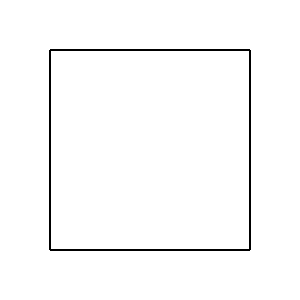

In [3]:
@draw begin
    for i in 1:4
        forward(🐢, 200)
        turn(🐢, 90)
    end
end 300 300

#### Exercise 4-2
Write a function called `square` that takes a parameter named `t`, which is a turtle. It should use the turtle to draw a square.
#### Exercise 4-3
Write a function call that passes `t` as an argument to `square`, and then run the macro again.

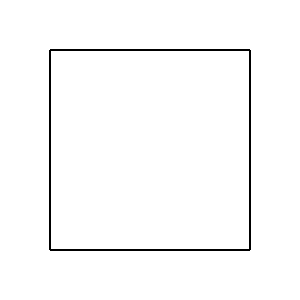

In [30]:
function square(t)
    for i in 1:4
        forward(t, 200)
        turn(t, 90)
    end
end

@draw begin
    square(🐢)
end 300 300

#### Exercise 4-4
Add another parameter, named `len`, to `square`. Modify the body so length of the sides is `len`, and then modify the function call to provide a second argument. Run the macro again. Test with a range of values for len.

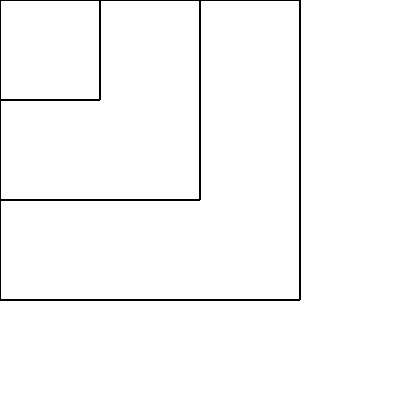

In [31]:
🐢 = Turtle(-200, -200)
function square(t, len)
    for i in 1:4
        forward(t, len)
        turn(t, 90)
    end
end

@draw begin
    for i in 1:3
        square(🐢, i * 100)
    end
end 400 400

#### Exercise 4-5
Make a copy of square and change the name to polygon. Add another parameter named n and modify the body so it draws an n-sided regular polygon.

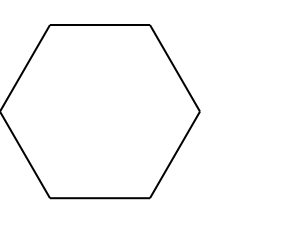

In [32]:
🐢 = Turtle(-100, -100)

function polygon(t, n, len)
    angle = 360 / n
    for i in 1:n
        forward(t, len)
        turn(t, angle)
    end
end

@draw begin
    polygon(🐢, 6, 100)
end 300 250

#### Exercise 4-6
Write a function called `circle` that takes a turtle, `t`, and radius, `r`, as parameters and that draws an approximate circle by calling polygon with an appropriate length and number of sides. Test your function with a range of values of `r`.

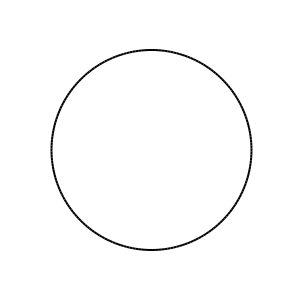

In [33]:
🐢 = Turtle(0, -100)

function ncircle(t, r)
    circumference = 2 * π * r
    n = trunc(circumference / 3) + 3
    len = circumference / n
    polygon(t, n, len)
end

@draw begin
    ncircle(🐢, 100)
end 300 300

#### Exercise 4-7
Make a more general version of circle called `arc` that takes an additional parameter `angle`, which determines what fraction of a circle to draw. `angle` is in units of degrees, so when `angle = 360`, `arc` should draw a complete circle.

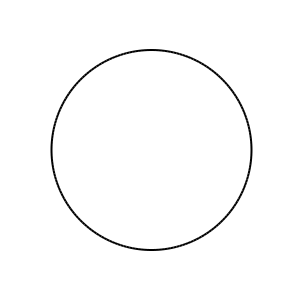

In [34]:
function polyline(t, n, len, angle)
    for i in 1:n
        forward(t, len)
        turn(t, -angle)
    end
end

function polygon(t, n, len)
    angle = 360 / n
    polyline(t, n, len, angle)
end

function narc(t, r, angle)
    arc_len = 2 * π * r * angle / 360
    n = trunc(arc_len / 3) + 1
    step_len = arc_len / n
    step_angle = angle / n
    polyline(t, n, step_len, step_angle)
end

function ncircle(t, r)
    narc(t, r, 360)
end

🐢 = Turtle(0, 100)
@draw begin
    ncircle(🐢, 100)
end 300 300

#### Exercise 4-9
Write an appropriately general set of functions that can draw flowers as in Turtle flowers.


## 5. Conditionals and Recursion

#### Exercise 5-2
The function time returns the current Greenwich Mean Time in seconds since “the epoch”, which is an arbitrary time used as a reference point. On UNIX systems, the epoch is 1 January 1970.  
Write a script that reads the current time and converts it to a time of day in hours, minutes, and seconds, plus the number of days since the epoch.

In [23]:
function parse_date(t)
    days, r = divrem(round(t, digits=0), 86400)
    hours, r1 = divrem(r, 3600)
    minutes, seconds = divrem(r1, 60)
    println("$(Int(days)) days since epoch. Time: $(Int(hours)):$(Int(minutes)):$(Int(seconds))")
end

parse_date(time())

18847 days since epoch. Time: 6:29:16


#### Exercise 5-3
Fermat’s Last Theorem says that there are no positive integers $a$, $b$, and $c$ such that

$$a^n + b^n = c^n$$

for any value of $n$ greater than 2.

Write a function named checkfermat that takes four parameters - `a, b, c and n` - and checks to see if Fermat’s theorem holds. If `n` is greater than 2 and `a^n + b^n == c^n` the program should print, “Holy smokes, Fermat was wrong!” Otherwise the program should print, “No, that doesn’t work.”

Write a function that prompts the user to input values for a, b, c and n, converts them to integers, and uses checkfermat to check whether they violate Fermat’s theorem.

In [24]:
function checkfermat(a, b, c, n)
  a, b, c, n = UInt128(a), UInt128(b), UInt128(c), UInt128(n)
  if (a ^ n + b ^ n) == c ^ n
    return true
  else
    return false
  end
end

for a in 2:100
  for b in 2:100
    for c in 2:100
      for n in 2:20
        if checkfermat(a, b, c, n) && n > 2
          println("a: $a \nb: $b \nc: $c\nn: $n")
          println("Holy smokes, Fermat was wrong!")
        end
      end
    end
  end
end

In [25]:
function istriangle(a, b, c)
    if (a + b < c || b + c < a || a + c < b)
        println("No")
    else
        println("Yes")
    end
end
istriangle(2, 4, 5)

Yes


#### Exercise 5-4
If you are given three sticks, you may or may not be able to arrange them in a triangle. For example, if one of the sticks is 12 inches long and the other two are one inch long, you will not be able to get the short sticks to meet in the middle. For any three lengths, there is a simple test to see if it is possible to form a triangle:

> If you are given three sticks, you may or may not be able to arrange them in a triangle. For example, if one of the sticks is 12 inches long and the other two are one inch long, you will not be able to get the short sticks to meet in the middle. For any three lengths, there is a simple test to see if it is possible to form a triangle:

1. Write a function named `istriangle` that takes three integers as arguments, and that prints either “Yes” or “No”, depending on whether you can or cannot form a triangle from sticks with the given lengths.

2. Write a function that prompts the user to input three stick lengths, converts them to integers, and uses `istriangle` to check whether sticks with the given lengths can form a triangle.

In [30]:
function check_triangle()
    print("Enter 3 length to check if they can form a triangle:")
    a = readline()
    b = readline()
    c = readline()
    @show a b c
    a, b, c = parse(Int64, a), parse(Int64, b), parse(Int64, c)
    istriangle(a, b, c)
end
check_triangle()

Enter 3 length to check if they can form a triangle:stdin> 1
stdin> 2
stdin> 3
a = "1"
b = "2"
c = "3"
Yes


#### Exercise 5-5
1. What would happen if you called this function like this: recurse(-1, 0)?
> StackOverflowError

2. Write a docstring that explains everything someone would need to know in order to use this function (and nothing else).

In [25]:
"""
s + ∑i, 0 ≤ i ≤ n, i ∈ ℕ 
"""
function recurse(n, s)
    if n == 0
        println(s)
    else
        recurse(n-1, n+s)
    end
end

recurse(4, 2)

12


#### Exercise 5-6
Read the following function and see if you can figure out what it does (see the examples in Case Study: Interface Design). Then run it and see if you got it right.

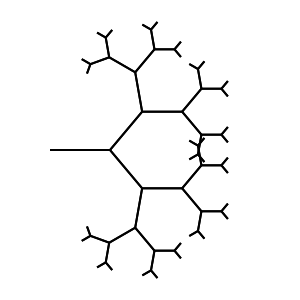

In [28]:
🐢 = Turtle(-100, 0)

function ex_draw(t, length, n)
    if n == 0
        return
    end
    angle = 50
    forward(t, length*n)
    turn(t, -angle)
    ex_draw(t, length, n-1)
    turn(t, 2*angle)
    ex_draw(t, length, n-1)
    turn(t, -angle)
    forward(t, -length*n)
end

@draw begin
    ex_draw(🐢, 10, 6)
end 300 300

#### Exercise 5-7

![](https://upload.wikimedia.org/wikipedia/commons/6/65/Kochsim.gif)

The Koch curve is a fractal that looks something like [A Koch curve](). To draw a Koch curve with length x, all you have to do is

1. Draw a Koch curve with length $\frac{x}{3}$.

2. Turn left 60 degrees.

3. Draw a Koch curve with length $\frac{x}{3}$.

4. Turn right 120 degrees.

5. Draw a Koch curve with length $\frac{x}{3}$.

6. Turn left 60 degrees.

7. Draw a Koch curve with length $\frac{x}{3}$.


The exception is if x is less than 3: in that case, you can just draw a straight line with length x.

1. Write a function called koch that takes a turtle and a length as parameters, and that uses the turtle to draw a Koch curve with the given length.
2. Write a function called snowflake that draws three Koch curves to make the outline of a snowflake.
3. The Koch curve can be generalized in several ways. See https://en.wikipedia.org/wiki/Koch_snowflake for examples and implement your favorite.

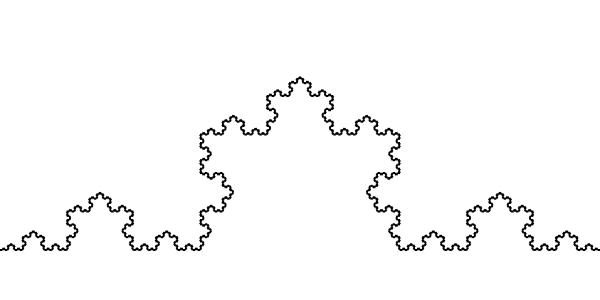

In [47]:
function koch(t, len)
    if len < 3
        forward(t, len)
    else
        angle = 60
        n = len / 3
        koch(t, n)
        turn(t, -angle)
        koch(t, n)
        turn(t, 2 * angle)
        koch(t, n)
        turn(t, -angle)
        koch(t, n)
    end
end

🐢 = Turtle(-300, 100)

@draw begin
    koch(🐢, 600)
end 600 300

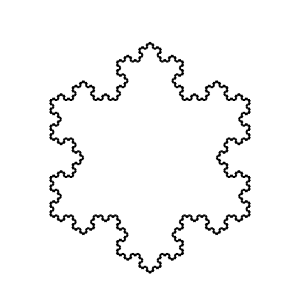

In [61]:
function snowflake(t, len)
    for i in 1:3
        kock(t, len)
        turn(t, 120)
    end
end

🐢 = Turtle(-100, -50)

@draw begin
    snowflake(🐢, 200)
end 300 300

## 6. Fruitful Functions

#### Exercise 6-5
The Ackermann function, $A(m,n)$, is defined:

$$ A(m, n) = 
\begin{cases}
n + 1 &\text{if m = 0} \\
A(m - 1, 1) &\text{if m > 0 and n = 0} \\
A(m - 1, A(m, n-1)) &\text{if m > 0 and n > 0}
\end{cases} $$

See https://en.wikipedia.org/wiki/Ackermann_function. Write a function named `ack` that evaluates the Ackermann function. Use your function to evaluate `ack(3, 4)`, which should be 125. What happens for larger values of `m` and `n`?

In [46]:
function ack(m, n)
    if m == 0
        n + 1
    elseif m > 0 && n == 0
        ack(m - 1, 1)
    else
        ack(m - 1, ack(m, n - 1))
    end
end

@time ack(3, 12)

  1.139171 seconds


32765

#### Exercise 6-6
A palindrome is a word that is spelled the same backward and forward, like “noon” and “redivider”. Recursively, a word is a palindrome if the first and last letters are the same and the middle is a palindrome.

1. Test these functions out. What happens if you call middle with a string with two letters? One letter? What about the empty string, which is written "" and contains no letters?
2. Write a function called `ispalindrome` that takes a string argument and returns `true` if it is a palindrome and `false` otherwise. Remember that you can use the built-in function length to check the length of a string.

In [74]:
function ispalindrome(word)
    if length(word) > 1
        first = firstindex(word)
        last = lastindex(word)
        if word[first] != word[last]
            return false
        else
            ispalindrome(word[nextind(word, first) : prevind(word, last)])
        end
    end
    return true
end

ispalindrome("redivider")

true

#### Exercise 6-7
A number, $a$, is a power of $b$ if it is divisible by $b$ and $\frac{a}{b}$ is a power of $b$. Write a function called `ispower` that takes parameters `a` and `b` and returns `true` if `a` is a power of `b`.

In [80]:
function ispower(a, b)
    if a < b
        return false
    elseif a == b
        return true
    else
        d, r = divrem(a, b)
        if r == 0
            return ispower(d, b)
        else
            return false
        end
    end
end

ispower(27, 3)

true

#### Exercise 6-8
The greatest common divisor (GCD) of $a$ and $b$ is the largest number that divides both of them with no remainder.

One way to find the GCD of two numbers is based on the observation that if $r$ is the remainder when a is divided by $b$, then `gcd(a, b) = gcd(b, r)`. As a base case, we can use `gcd(a, 0) = a`.

Write a function called `gcd` that takes parameters a and b and returns their greatest common divisor.

Credit: This exercise is based on an example from Abelson and Sussman’s Structure and Interpretation of Computer Programs.

In [85]:
function gcd(a, b)
    if b == 0
        return a
    else
        div, rem = divrem(a, b)
        return gcd(b, rem)
    end
end

gcd(8, 12)

4

## 7. Iteration

#### Exercise 7-2
Copy the loop from Square Roots and encapsulate it in a function called mysqrt that takes a as a parameter, chooses a reasonable value of x, and returns an estimate of the square root of a.

To test it, write a function named testsquareroot that prints a table like this:

The first column is a number, a; the second column is the square root of a computed with mysqrt; the third column is the square root computed by sqrt; the fourth column is the absolute value of the difference between the two estimates.

In [6]:
function mysqrt(a, x)
    ϵ = 0.0001
    while true
        y = (x + a/x) / 2
        if abs(y - x) < ϵ
            return y
        end
        x = y
    end
end

mysqrt(2, 2)

1.4142135623746899

In [31]:
# import Pkg; Pkg.add("Formatting")

In [12]:
using Formatting

In [30]:
function testsquareroot()
    printfmt("a\t {:<10} \t {:<10} \t {:<10}\n", "mysqrt", "sqrt", "diff")
    printfmt("-----------------------------------------------------\n")
    for a in 1:9
        m = mysqrt(a, a/2)
        s = sqrt(a)
        diff = abs(s - m)
        printfmt("$a\t {:.6f} \t {:.6f} \t {:.10f}\n", m, s, diff)
    end
end

testsquareroot()

a	 mysqrt     	 sqrt       	 diff      
-----------------------------------------------------
1	 1.000000 	 1.000000 	 0.0000000000
2	 1.414214 	 1.414214 	 0.0000000000
3	 1.732051 	 1.732051 	 0.0000000024
4	 2.000000 	 2.000000 	 0.0000000000
5	 2.236068 	 2.236068 	 0.0000000004
6	 2.449490 	 2.449490 	 0.0000000000
7	 2.645751 	 2.645751 	 0.0000000000
8	 2.828427 	 2.828427 	 0.0000000000
9	 3.000000 	 3.000000 	 0.0000000000


#### Exercise 7-3

The built-in function `Meta.parse` takes a string and transforms it into an expression. This expression can be evaluated in Julia with the function `Core.eval`.

Write a function called `evalloop` that iteratively prompts the user, takes the resulting input and evaluates it using eval, and prints the result. It should continue until the user enters done, and then return the value of the last expression it evaluated.

In [36]:
function evalloop()
    result = nothing
    println("Enter your expression")
    while true
        text = readline()
        if text == "done"
            println(result)
            break
        else
            expr = Meta.parse(text)
            result = eval(expr)
            println(result)
        end
    end
end

evalloop()

Enter your expression
stdin> 1 + 2
3
stdin> 5 ^ 6
15625
stdin> done
15625


#### Exercise 7-4
The mathematician Srinivasa Ramanujan found an infinite series that can be used to generate a numerical approximation of $\frac{1}{\pi}$:

$$ \frac{1}{\pi} = \frac{2\sqrt{2}}{9801} \sum_{k=0}^{\infty} \frac{(4k)!(1103 + 26390k)}{(k!)^4 396^{4k}} $$

Write a function called `estimatepi` that uses this formula to compute and return an estimate of $\pi$. It should use a while loop to compute terms of the summation until the last term is smaller than `1e-15` (which is Julia notation for $10^{−15}$). You can check the result by comparing it to $\pi$.

In [44]:
function estimastepi()
  temp = 1
  s = 0
  k = 0

  while temp > 1e-15
    temp = (factorial(4 * k) * (1103 + 26390k)) / (factorial(k) ^ 4 * 396 ^ (4 * k))
    s += temp
    k += 1
  end

  1 / ((2 * sqrt(2)) / 9801 * s)
end

println("Estimated pi: $(estimastepi())")

Estimated pi: 3.1415926535904917


In [47]:
π

π = 3.1415926535897...

## 8. Strings


#### Exercise 8-8
There is a built-in function called count that is similar to the function in Looping and Counting. Read the documentation of this function and use it to count the number of a’s in "banana".

In [49]:
count("a", "banana")

3

#### Exercise 8-9
A string slice can take a third index. The first specifies the start, the third the end and the second the “step size”; that is, the number of spaces between successive characters. A step size of 2 means every other character; 3 means every third, etc.
A step size of -1 goes through the word backwards, so the slice `[end:-1:1]` generates a reversed string.

Use this idiom to write a one-line version of `ispalindrome` from Exercise 6-6.

In [4]:
function ispalindrome2(a)
    return a[end:-1:1] == a
end

ispalindrome2("boob")

true

#### Exercise 8-11
A Caesar cypher is a weak form of encryption that involves “rotating” each letter by a fixed number of places. To rotate a letter means to shift it through the alphabet, wrapping around to the beginning if necessary, so `’A’` rotated by 3 is `’D’` and `’Z’` rotated by 1 is `’A’`.

To rotate a word, rotate each letter by the same amount. For example, `"cheer"` rotated by 7 is `"jolly"` and `"melon"` rotated by -10 is `"cubed"`. In the movie 2001: A Space Odyssey, the ship computer is called HAL, which is IBM rotated by -1.

Write a function called `rotateword` that takes a string and an integer as parameters, and returns a new string that contains the letters from the original string rotated by the given amount.

In [67]:
str = "abcdefghijklmnopqrstuvwxyz"

function rotateword(word, by)
    rotated = ""
    for c in lowercase(word)
        idx = findfirst(c, str)
        i = (idx + by) % 26
        if i <= 0
            i = 26 + i
        end
        rotated = rotated * str[i]
    end
    rotated
end

rotateword("xpwzy", -11)

"melon"

## 9. Case Study: Word Play

#### Exercise 9-7
This question is based on a Puzzler that was broadcast on the radio program Car Talk (https://www.cartalk.com/puzzler/browse):

> Give me a word with three consecutive double letters. I’ll give you a couple of words that almost qualify, but don’t. For example, the word committee, c-o-m-m-i-t-t-e-e. It would be great except for the i that sneaks in there. Or Mississippi: M-i-s-s-i-s-s-i-p-p-i. If you could take out those i’s it would work. But there is a word that has three consecutive pairs of letters and to the best of my knowledge this may be the only word. Of course there are probably 500 more but I can only think of one. What is the word?

Write a program to find it.

In [11]:
function is_consecutive_double_letter(word)
    if length(word) < 6
        return false
    end
    i = firstindex(word)
    j = lastindex(word)
    while i + 5 <= j
        sub = word[i:i+5]
        if sub[1:2:end] == sub[2:2:end]
            return true
        end
        i += 1
    end
    return false
end

words = open("words.txt")
for w in eachline(words)
    if is_consecutive_double_letter(w)
        println(w)
    end
end
close(words)

bookkeeper
bookkeepers
bookkeeping
bookkeepings


#### Exercise 9-8
Here’s another Car Talk Puzzler (https://www.cartalk.com/puzzler/browse):

> I was driving on the highway the other day and I happened to notice my odometer. Like most odometers, it shows six digits, in whole miles only. So, if my car had 300000 miles, for example, I’d see 3-0-0-0-0-0.  
Now, what I saw that day was very interesting. I noticed that the last 4 digits were palindromic; that is, they read the same forward as backward. For example, 5-4-4-5 is a palindrome, so my odometer could have read 3-1-5-4-4-5.  
One mile later, the last 5 numbers were palindromic. For example, it could have read 3-6-5-4-5-6. One mile after that, the middle 4 out of 6 numbers were palindromic. And you ready for this? One mile later, all 6 were palindromic!  
The question is, what was on the odometer when I first looked?

Write a Julia program that tests all the six-digit numbers and prints any numbers that satisfy these requirements.



In [11]:
function is_palindrome_number(n)
    if ispalindrome2(string(n)[3:end])
        n += 1
        if ispalindrome2(string(n)[2:end])
            n += 1
            if ispalindrome2(string(n)[2:5])
                n += 1
                if ispalindrome2(string(n))
                    return true
                end
            end
        end
    end
    return false
end

is_palindrome_number (generic function with 1 method)

In [13]:
for i in 100000:999999
    if is_palindrome_number(i)
        println(i)
    end
end

198888
199999


#### Exercise 9-9
Here’s another Car Talk Puzzler you can solve with a search (https://www.cartalk.com/puzzler/browse):

> Recently I had a visit with my mom and we realized that the two digits that make up my age when reversed resulted in her age. For example, if she’s 73, I’m 37. We wondered how often this has happened over the years but we got sidetracked with other topics and we never came up with an answer.  
When I got home I figured out that the digits of our ages have been reversible six times so far. I also figured out that if we’re lucky it would happen again in a few years, and if we’re really lucky it would happen one more time after that. In other words, it would have happened 8 times over all. So the question is, how old am I now?

Write a Julia program that searches for solutions to this Puzzler.

In [26]:
function lucky_age()
    for n in 1:100
        last_digit = n % 10
        reversed = last_digit * 10 + (n - last_digit) ÷ 10
        println(n, lpad(reversed, reversed - n))
        n += 1
    end
end

lucky_age()

1       10
2                20
3                         30
4                                  40
5                                           50
6                                                    60
7                                                             70
8                                                                      80
9                                                                               90
101
1111
12       21
13                31
14                         41
15                                  51
16                                           61
17                                                    71
18                                                             81
19                                                                      91
202
2112
2222
23       32
24                42
25                         52
26                                  62
27                                           72
28                                                    82

In [21]:
println("Easy to see that only 57-75 is the answer (the mother give birth to him at age 18)")

Easy to see that only 57-75 is the answer (the mother give birth to him at age 18)


## 10. Arrays

#### Exercise 10-1
Write a function called `nestedsum` that takes an array of arrays of integers and adds up the elements from all of the nested arrays. For example:

In [63]:
function nestedsum(a)
    return sum(sum.(a))
end

t = [[1, 2], [3], [4, 5, 6]]
nestedsum(t)

21

#### Exercise 10-2
Write a function called `cumulsum` that takes an array of numbers and returns the cumulative sum; that is, a new array where the ith element is the sum of the first $i$ elements from the original array.

In [66]:
function cumulsum(a)
    c = 0
    res = []
    for i in a
        c += i
        push!(res, c)
    end
    res
end

t = [1, 2, 3]
print(cumulsum(t))

Any[1, 3, 6]

#### Exercise 10-3
Write a function called `interior` that takes an array and returns a new array that contains all but the first and last elements. 

In [68]:
function interior(a)
    return a[2:end-1]
end

t = [1, 2, 3, 4]
print(interior(t))

[2, 3]

#### Exercise 10-4
Write a function called `interior!` that takes an array, modifies it by removing the first and last elements, and returns nothing.

In [69]:
function interior!(a)
    deleteat!(a, 1)
    deleteat!(a, length(a))
end

t = [1, 2, 3, 4]
interior!(t)
print(t)

[2, 3]

#### Exercise 10-5
Write a function called `issort` that takes an array as a parameter and returns true if the array is sorted in ascending order and false otherwise.

In [8]:
function issort(a)
    i = firstindex(a)
    while i < length(a)
        j = nextind(a, i)
        if a[i] > a[j]
            return false
        end
        i = j
    end
    true
end

println(issort([1, 2, 3, 4, 5]))
println(issort(['b', 'a']))

true
false


#### Exercise 10-6
Two words are anagrams if you can rearrange the letters from one to spell the other. Write a function called `isanagram` that takes two strings and returns true if they are anagrams.

In [13]:
function isanagram(s1, s2)
    a1 = collect(s1)
    a2 = collect(s2)
    for i in a1
        if i ∉ a2
            return false
        end
    end
    true
end

isanagram (generic function with 1 method)

In [14]:
isanagram("hello", "eholl")

true

#### Exercise 10-7
Write a function called `hasduplicates` that takes an array and returns true if there is any element that appears more than once. It should not modify the original array.

In [15]:
function hasduplicates(a)
    temp = []
    for i in a
        if i ∉ temp
            push!(temp, i)
        else
            return true
        end
    end
    return false
end

hasduplicates([1, 2, 3])

false

#### Exercise 10-8
This exercise pertains to the so-called Birthday Paradox, which you can read about at https://en.wikipedia.org/wiki/Birthday_paradox.

If there are 23 students in your class, what are the chances that two of you have the same birthday? You can estimate this probability by generating random samples of 23 birthdays and checking for matches.

In [20]:
function birthday_paradox(n=23)
    duplicated = []
    for i in 1:1000
        students = []
        for i in 1:n
            push!(students, rand(1:365))
        end
        push!(duplicated, hasduplicates(students))
    end
    sum(duplicated) / length(duplicated)
end

birthday_paradox()

0.497

#### Exercise 10-9
Write a function that reads the file `words.txt` and builds an array with one element per word. Write two versions of this function, one using `push!` and the other using the idiom `t = [t..., x]`. Which one takes longer to run? Why?

In [2]:
function read1(file)
    f = open(file)
    res = []
    for i in eachline(f)
        push!(res, i)
    end
    close(f)
    res
end

function read2(file)
    f = open(file)
    res = []
    for i in eachline(f)
        res = [res..., i]
    end
    close(f)
    res
end

read2 (generic function with 1 method)

In [3]:
@time read1("words.txt");

  0.011453 seconds (113.87 k allocations: 5.487 MiB)


In [4]:
@time read2("words.txt");

 69.167850 seconds (566.53 k allocations: 96.531 GiB, 2.67% gc time)


Use `push!` is much faster, because it using the old array, not clone to new array each loop like `t = [t..., x]`

#### Exercise 10-10
To check whether a word is in the word array, you could use the `∈` operator, but it would be slow because it searches through the words in order.

Because the words are in alphabetical order, we can speed things up with a bisection search (also known as binary search), which is similar to what you do when you look a word up in the dictionary. You start in the middle and check to see whether the word you are looking for comes before the word in the middle of the array. If so, you search the first half of the array the same way. Otherwise you search the second half.

Either way, you cut the remaining search space in half. If the word array has 113,809 words, it will take about 17 steps to find the word or conclude that it’s not there.

Write a function called `inbisect` that takes a sorted array and a target value and returns true if the word is in the array and false if it’s not.

In [34]:
function inbisect(arr, word, l, r)
    if r >= l
        mid = l + (r - l) ÷ 2
        if arr[mid] == word
            return true
        elseif arr[mid] > word
            return inbisect(arr, word, l, mid-1)
        else
            return inbisect(arr, word, mid + 1, r)
        end
    else
        return false
    end
end

arr = ["dog", "cat", "duck", "chicken", "lion", "tiger"]

@time println(inbisect(arr, "tiger", 1, length(arr)))
println(inbisect(arr, "whale", 1, length(arr)))

true
  0.009557 seconds (5.30 k allocations: 291.819 KiB, 99.12% compilation time)
false


#### Exercise 10-11
Two words are a “reverse pair” if each is the reverse of the other. Write a program `reversepairs` that finds all the reverse pairs in the word array.

In [14]:
function reversepairs()
    bag = []
    open("words.txt") do file
        words = []
        for i in eachline(file)
            push!(words, i)
        end
        wl = length(words)
        for w in words
            rev = reverse(w)
            if inbisect(words, rev, 1, wl)
                p = [rev, w]
                if p ∉ bag
                    push!(bag, [w, rev])
                end
            end
        end
    end

    bag
end

reversepairs()

488-element Vector{Any}:
 ["aa", "aa"]
 ["aba", "aba"]
 ["abut", "tuba"]
 ["ad", "da"]
 ["ados", "soda"]
 ["aga", "aga"]
 ["agar", "raga"]
 ["agas", "saga"]
 ["agenes", "senega"]
 ["ah", "ha"]
 ["aha", "aha"]
 ["aider", "redia"]
 ["airts", "stria"]
 ⋮
 ["tit", "tit"]
 ["toot", "toot"]
 ["tort", "trot"]
 ["tot", "tot"]
 ["tow", "wot"]
 ["trow", "wort"]
 ["tut", "tut"]
 ["vav", "vav"]
 ["waw", "waw"]
 ["way", "yaw"]
 ["wow", "wow"]
 ["yay", "yay"]

#### Exercise 10-12
Two words “interlock” if taking alternating letters from each forms a new word. For example, “shoe” and “cold” interlock to form “schooled”.

Credit: This exercise is inspired by an example at http://puzzlers.org.

1. Write a program that finds all pairs of words that interlock.

> Don’t enumerate all pairs!

2. Can you find any words that are three-way interlocked; that is, every third letter forms a word, starting from the first, second or third?

In [14]:
w = "ahdae"
a, b = w[1:2:end], w[2:2:end]

("ade", "ha")

In [28]:
function interlock()
    words = []
    open("words.txt") do file
        for i in eachline(file)
            push!(words, i)
        end
    end
    len = length(words)
    res = []
    for w in words
        even, odd = w[1:2:end], w[2:2:end]
        if length(even) >= 2 && length(odd) >= 2
            if inbisect(words, even, 1, len) && inbisect(words, odd, 1, len)
                # println("$even + $odd = $(even * odd)")
                push!(res, (even, odd, w))
            end
        end
    end
    res
    # print(words[findmax(length.(words))[2]])
end

interlock()


1254-element Vector{Any}:
 ("ah", "as", "aahs")
 ("aby", "be", "abbey")
 ("aid", "be", "abied")
 ("ais", "be", "abies")
 ("ar", "bi", "abri")
 ("ars", "bi", "abris")
 ("ay", "be", "abye")
 ("ays", "be", "abyes")
 ("ars", "cos", "across")
 ("add", "de", "added")
 ("ais", "do", "adios")
 ("anus", "don", "adnouns")
 ("arf", "dit", "adrift")
 ⋮
 ("wud", "ons", "wounds")
 ("wet", "rah", "wreath")
 ("wets", "rah", "wreaths")
 ("wis", "re", "wries")
 ("wis", "ret", "wriest")
 ("yid", "ar", "yaird")
 ("yid", "ars", "yairds")
 ("ya", "eh", "yeah")
 ("ya", "en", "yean")
 ("ya", "er", "year")
 ("ya", "es", "yeas")
 ("ya", "un", "yuan")

## 11. Dictionaries

#### Exercise 11-2
Write a function that reads the words in `words.txt` and stores them as keys in a dictionary. It doesn’t matter what the values are. Then you can use the ∈ operator as a fast way to check whether a string is in the dictionary.

If you did Exercise 10-10, you can compare the speed of this implementation with the array ∈ operator and the bisection search.

In [33]:
function words_to_dict(f)
    d = Dict()
    for w in eachline(f)
        d[w] = nothing
    end
    d
end

open("words.txt") do f
    words = words_to_dict(f)
    @time "hello" ∈ keys(words)
end

  0.000001 seconds


true

#### Exercise 11-4
Memoize the Ackermann function from Exercise 6-5 and see if memoization makes it possible to evaluate the function with bigger arguments.

In [45]:
mem = Dict()

function ack(m, n)
    if m == 0
        n + 1
    elseif m > 0 && n == 0
        if [m - 1, 1] ∉ keys(mem)
            mem[[m - 1, 1]] = ack(m - 1, 1)
        else
            mem[[m - 1, 1]]
        end
    else
        if [m, n - 1] ∉ keys(mem)
            mem[[m, n - 1]] = ack(m, n - 1)
        end
        ack(m - 1, mem[[m, n - 1]])
    end
end

@time ack(3, 12)

  0.049768 seconds (458.58 k allocations: 26.419 MiB, 14.23% gc time)


32765

#### Exercise 11-5
If you did Exercise 10-7, you already have a function named `hasduplicates` that takes an array as a parameter and returns `true if` there is any object that appears more than once in the array.

Use a dictionary to write a faster, simpler version of hasduplicates.

In [53]:
function hasduplicates2(a)
    d = Dict()
    for i in a
        if i ∉ keys(d)
            d[i] = 1
        else
            return true
        end
    end
    return false
end

@time println(hasduplicates2([1, 2, 3, 4, 5]))
@time println(hasduplicates2([1, 2, 1, 4, 5]))

false
  0.000064 seconds (35 allocations: 1.344 KiB)
true
  0.000160 seconds (146 allocations: 10.516 KiB)


#### Exercise 11-6
Two words are “rotate pairs” if you can rotate one of them and get the other (see rotateword in Exercise 8-11).

Write a program that reads a word array and finds all the rotate pairs.

In [70]:
function rotate_pair(a)
    mem = Dict()
    res = Dict()
    for word in a
        if word ∉ keys(mem)
            for i in 1:25
                mem[rotateword(word, i)] = i
            end
        else
            res[word] = rotateword(word, -mem[word])
        end
    end
    res
end
       
rotate_pair(["melon", "lemon", "peach", rotateword("melon", 5), rotateword("peach", -6)])

Dict{Any, Any} with 2 entries:
  "rjqts" => "melon"
  "jyuwb" => "peach"

#### Exercise 11-7
Here’s another Puzzler from Car Talk (https://www.cartalk.com/puzzler/browse):

> This was sent in by a fellow named Dan O’Leary. He came upon a common one-syllable, five-letter word recently that has the following unique property. When you remove the first letter, the remaining letters form a homophone of the original word, that is a word that sounds exactly the same. Replace the first letter, that is, put it back and remove the second letter and the result is yet another homophone of the original word. And the question is, what’s the word?    
Now I’m going to give you an example that doesn’t work. Let’s look at the five-letter word, ‘wrack.’ W-R-A-C-K, you know like to ‘wrack with pain.’ If I remove the first letter, I am left with a four-letter word, ’R-A-C-K.’ As in, ‘Holy cow, did you see the rack on that buck! It must have been a nine-pointer!’ It’s a perfect homophone. If you put the ‘w’ back, and remove the ‘r,’ instead, you’re left with the word, ‘wack,’ which is a real word, it’s just not a homophone of the other two words.

But there is, however, at least one word that Dan and we know of, which will yield two homophones if you remove either of the first two letters to make two, new four-letter words. The question is, what’s the word?

> You can use the dictionary from Exercise 11-2 to check whether a string is in the word array.

TIP
To check whether two words are homophones, you can use the CMU Pronouncing Dictionary. You can download it from http://www.speech.cs.cmu.edu/cgi-bin/cmudict.

Write a program that lists all the words that solve the Puzzler.

## 12. Tuples

#### Exercise 12-2
Write a function called `mostfrequent` that takes a string and prints the letters in decreasing order of frequency. Find text samples from several different languages and see how letter frequency varies between languages. Compare your results with the tables at https://en.wikipedia.org/wiki/Letter_frequencies.

In [12]:
function mostfrequent(s)
    s = lowercase(s)
    d = Dict()
    for c in s
        d[c] = get(d, c, 0) + 1
    end
    rev = sort([(freq, char) for (char, freq) in d], rev=true)
    [char for (freq, char) in rev]
end

s = "squadra"
print(mostfrequent(s))

['a', 'u', 's', 'r', 'q', 'd']

#### Exercise 12-3
More anagrams!

1. Write a program that reads a word list from a file (see Reading Word Lists) and prints all the sets of words that are anagrams.  

2. Modify the previous program so that it prints the longest array of anagrams first, followed by the second longest, and so on.

3. In Scrabble a “bingo” is when you play all seven tiles in your rack, along with a letter on the board, to form an eight-letter word. What collection of 8 letters forms the most possible bingos?

In [14]:
function letters_map(words)
    d = Dict()
    for w in words
        letters = tuple(sort(collect(w))...)
        if letters ∉ keys(d)
            d[letters] = [w]
        else
            push!(d[letters], w)
        end
    end
    d
end

letters_map (generic function with 1 method)

In [29]:
function all_anagrams(words)
    letter_words = letters_map(words)
    res = []
    for (k, v) in letter_words
        if length(v) > 1
            push!(res, v)
        end
    end
    sort!(res, by=length, rev=true)
    res
end

open("words.txt") do f
    words = [i for i in eachline(f)]
    all_anagrams(words)
end

10157-element Vector{Any}:
 ["apers", "asper", "pares", "parse", "pears", "prase", "presa", "rapes", "reaps", "spare", "spear"]
 ["alerts", "alters", "artels", "estral", "laster", "ratels", "salter", "slater", "staler", "stelar", "talers"]
 ["least", "setal", "slate", "stale", "steal", "stela", "taels", "tales", "teals", "tesla"]
 ["estrin", "inerts", "insert", "inters", "niters", "nitres", "sinter", "triens", "trines"]
 ["capers", "crapes", "escarp", "pacers", "parsec", "recaps", "scrape", "secpar", "spacer"]
 ["anestri", "nastier", "ratines", "retains", "retinas", "retsina", "stainer", "stearin"]
 ["peris", "piers", "pries", "prise", "ripes", "speir", "spier", "spire"]
 ["aspers", "parses", "passer", "prases", "repass", "spares", "sparse", "spears"]
 ["lapse", "leaps", "pales", "peals", "pleas", "salep", "sepal", "spale"]
 ["acers", "acres", "cares", "carse", "escar", "races", "scare", "serac"]
 ["arles", "earls", "lares", "laser", "lears", "rales", "reals", "seral"]
 ["palest", "pal

In [19]:
function most_possible_bingo(words)
    letter_words = letters_map(words)
    count = 0
    bingo = nothing
    for (k, v) in letter_words
        if length(k) == 8
            if length(v) > count
                count = length(v)
                bingo = v
            end
        end
    end
    bingo
end

open("words.txt") do f
    words = [i for i in eachline(f)]
    print(most_possible_bingo(words))
end

["angriest", "astringe", "ganister", "gantries", "granites", "ingrates", "rangiest"]

#### Exercise 12-4
Two words form a “metathesis pair” if you can transform one into the other by swapping two letters; for example, “converse” and “conserve”. Write a program that finds all of the metathesis pairs in the dictionary.

> Don’t test all pairs of words, and don’t test all possible swaps.

Credit: This exercise is inspired by an example at http://puzzlers.org.

In [31]:
function is_metathesis_pair(word1, word2)
    diff_count = 0
    for (i, j) in zip(word1, word2)
        if i != j
            diff_count += 1
        end
        if diff_count > 2
            return false
        end
    end
    true
end

open("words.txt") do f
    words = [i for i in eachline(f)]
    anagrams = all_anagrams(words)
    res = []
    for word_list in anagrams
        i = firstindex(word_list)
        while i < length(word_list)
            j = nextind(word_list, i)
            word1 = word_list[i]
            for word2 in word_list[j:end]
                if is_metathesis_pair(word1, word2)
                    push!(res, (word1, word2))
                end
            end
            i = j
        end
    end
    res
end

3311-element Vector{Any}:
 ("pares", "parse")
 ("pares", "rapes")
 ("parse", "prase")
 ("pears", "reaps")
 ("prase", "presa")
 ("alters", "artels")
 ("artels", "ratels")
 ("laster", "salter")
 ("salter", "slater")
 ("slater", "staler")
 ("staler", "stelar")
 ("setal", "steal")
 ("slate", "stale")
 ⋮
 ("altruists", "ultraists")
 ("bin", "nib")
 ("copula", "cupola")
 ("big", "gib")
 ("feels", "flees")
 ("cine", "nice")
 ("outputs", "putouts")
 ("fief", "fife")
 ("meagerly", "meagrely")
 ("salving", "slaving")
 ("salved", "slaved")
 ("ministers", "misinters")

## 13. Case Study: Data Structure Selection